In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt
df=pd.read_csv('data/uec_data_2023_2025_full.csv')

In [3]:
df['weekday']= pd.to_datetime(df['Date'], dayfirst=True).dt.day_of_week

In [4]:
hosp_sums=df.groupby('Hospital')['Total'].sum()
hospitals_over_1 = hosp_sums[hosp_sums > 1].index.tolist()
#hospitals_over_1

## Total (ward+ed) Trollys Densities

<Axes: ylabel='Density'>

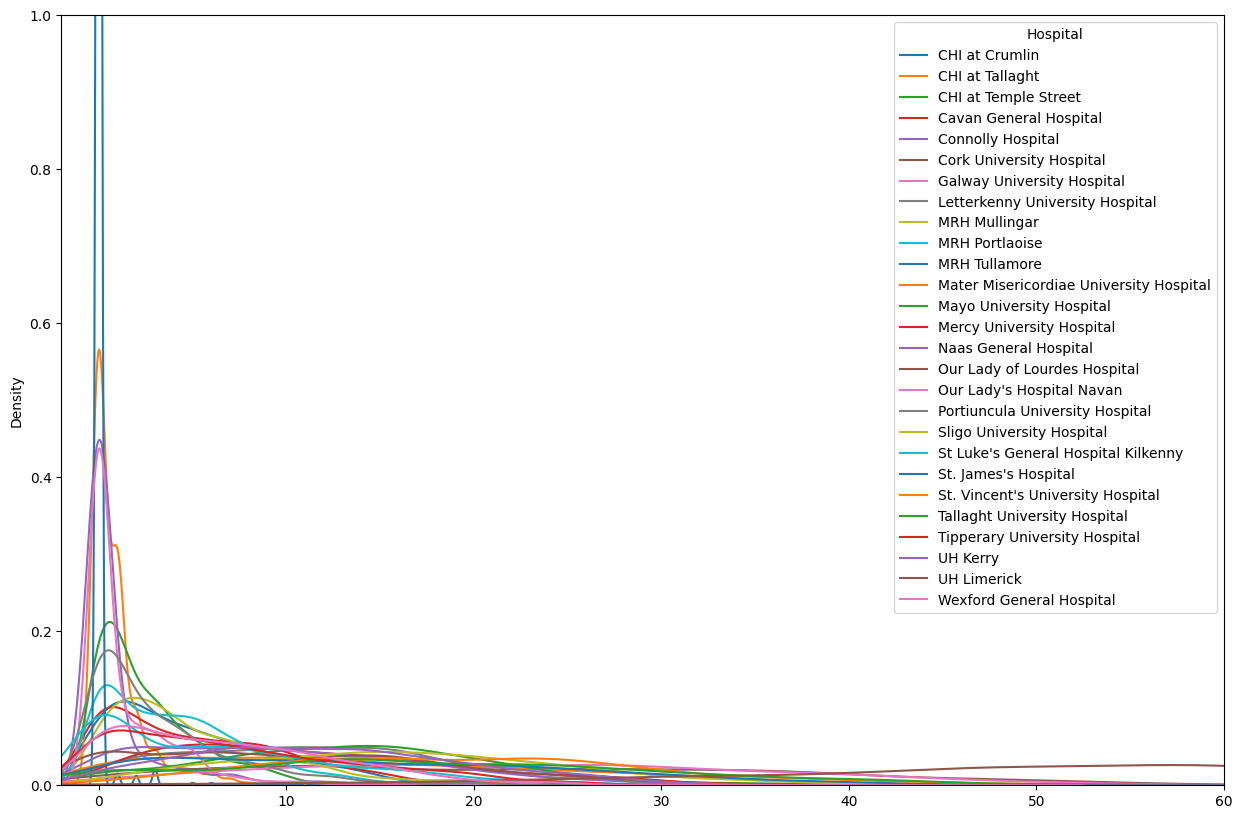

In [5]:

df_filt=df[(~df['Hospital'].str.contains('Total')) & (df['Hospital'].isin(hospitals_over_1))]

df_filt.pivot(columns='Hospital', values='Total').plot(kind='kde',figsize=(15,10),xlim=(-2,60),ylim=(0,1))


## Load 2022 population data

In [ ]:
pop_df=pd.read_excel("data/FP-HHR2022_Table_1.xlsx")
pop_df.columns=pop_df.loc[0]
pop_df=pop_df.drop(axis=1,index=0)
pop_dict=dict(zip(pop_df.iloc[:, 0], pop_df.iloc[:, 1]))

In [38]:
# normalize pop_dict keys (strip whitespace) and ensure numeric values
pop_dict_norm = {str(k).strip(): int(v) for k, v in pop_dict.items()}

# map Region -> population into new column 'Region_Population'
df['Region_Population'] = df['Region'].apply(lambda x: pop_dict_norm.get(x.strip()) if pd.notna(x) else np.nan)

# quick check of unmapped region values
print("Unmapped region values:", df[df['Region_Population'].isna()]['Region'].dropna().unique())

Unmapped region values: ['HSE Dublin & North East' 'HSE Dublin & Midlands'
 'HSE Dublin & South East' 'HSE West & North West']
